# 填充和步幅
卷积核的输出形状取决于输入形状和卷积核的形状。

假设以下情形，有时，在应用了连续的卷积之后，我们最终得到的输出远小于输入大小。这是由于卷积核的宽度和高度通常大于1所导致的。比如，一个 $240 \times 240$ 像素的图像，经过10层$5 \times 5$的卷积之后，将减少到 $200 \times 200$ 像素。如此一来，原始图像的边界丢失了许多有用的信息。而填充是解决此问题最好的办法：有时，我们可能希望大幅降低图像的宽度和高度。例如，如果我们发现原始的输入分辨率十分冗余。步幅则可以在类似的情况下提供帮助。

## 填充
在输入图像的边界填充元素(通常的填充元素是0)。例如在上个例子中，我们将 $3 \times 3$ 填充到 $5 \times 5$ ，那么它的输出就增加为 $4 \times 4$。阴影部分是第一个输出元素以及用于输出计算的输入和核张量元素： $0 \times 0 + 0 \times 1 + 0 \times 2 + 0 \times 3 = 0$。

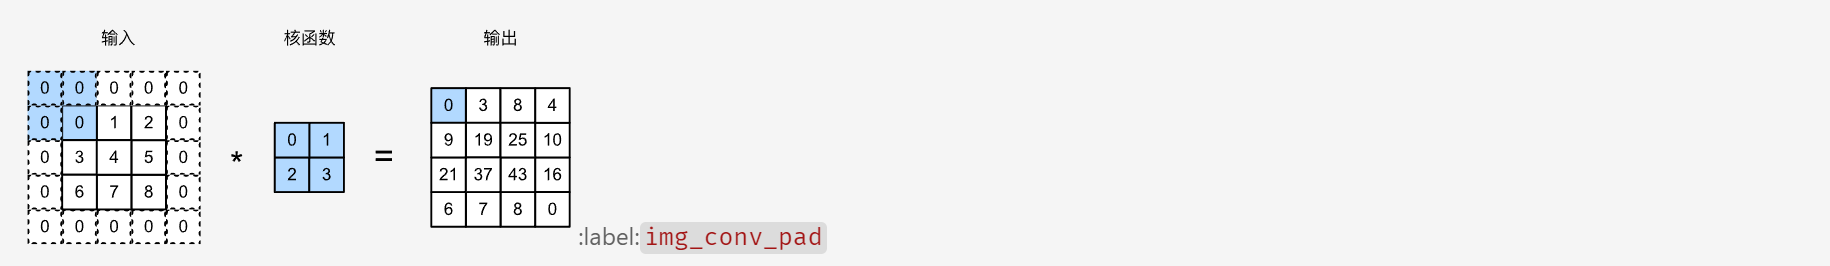

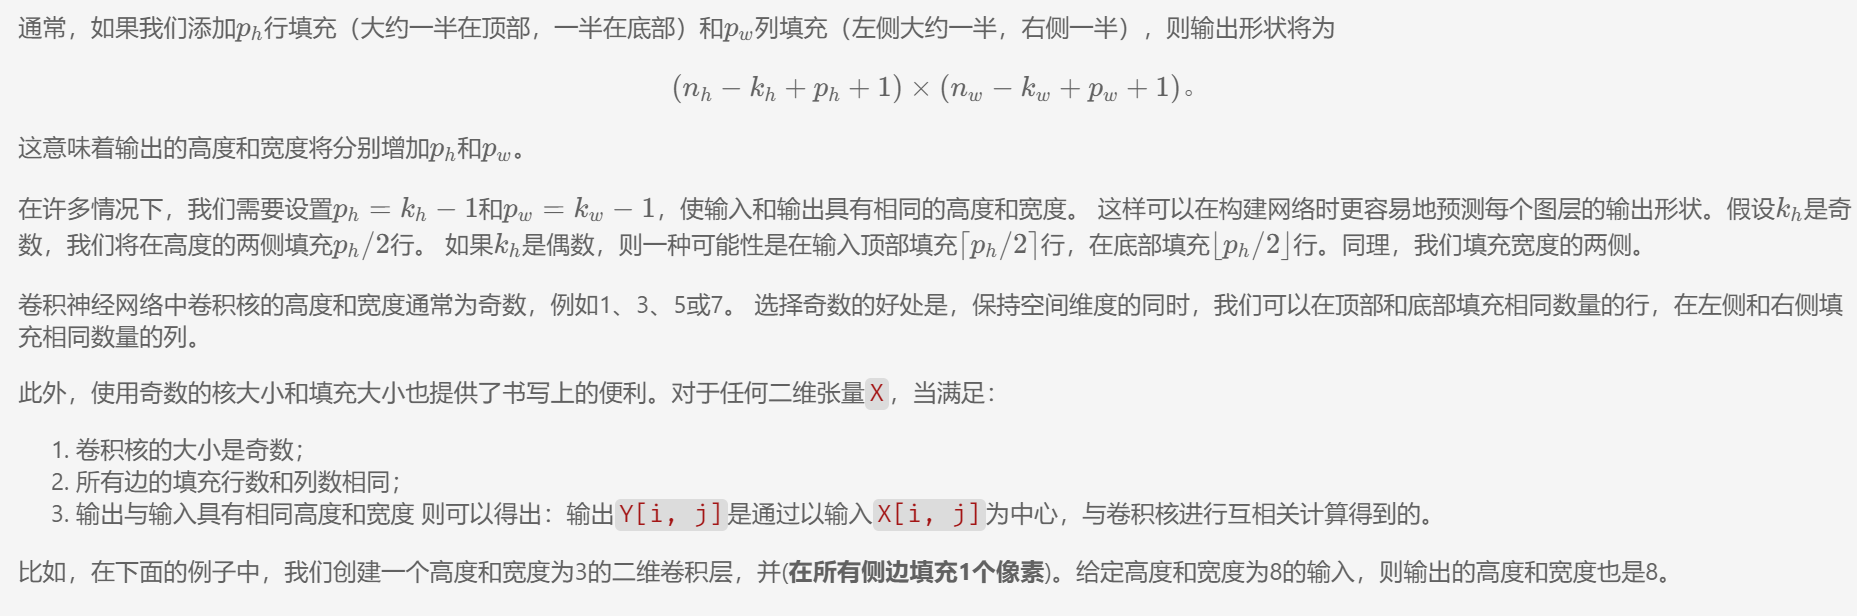

In [1]:
import torch
from torch import nn

# 为了简单起见，我们定义了一个计算卷积层的函数。
# 此函数初始化卷积层权重，并对输入和输出提高和缩减相应的维数
def comp_conv2d(conv2d, X):
    # 这里的(1, 1)表示批量大小和通道数都是1
    X= X.reshape((1, 1) + X.shape)
    Y = conv2d(X)
    # 省略前两个维度：批量大小和通道
    return Y.reshape(Y.shape[2:])

# 请注意，这里每遍都填充了1行或1列，因此总共添加了2行或2列。
# 我们可以用padding参数来设置填充的大小。
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=1)
X = torch.rand(size=(8, 8))
comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

当卷积核的高度和宽度不同时，我们可以\textbf{填充不同的高和宽度}， 是输出和输入具有相同的宽度和高度。在如下的示例里，我们使用高度为5，宽度为3的卷积核，高度和宽度的两边分别填充2和1。

In [2]:
conv2d = nn.Conv2d(1, 1, kernel_size=(5, 3), padding=(2, 1))
comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

## 步幅
在计算互相关时，卷积窗口从输入张量的左上角开始，向下、向右滑动。在前面的例子中，默认的是每次滑动一个元素。但是又是为了高效计算或是缩减采样次数，卷积窗口可以跳过中间位置，每次滑动多个元素。

将每次滑动的元素称之为步幅。到目前为止，只使用过高度为或宽度为1的步幅。

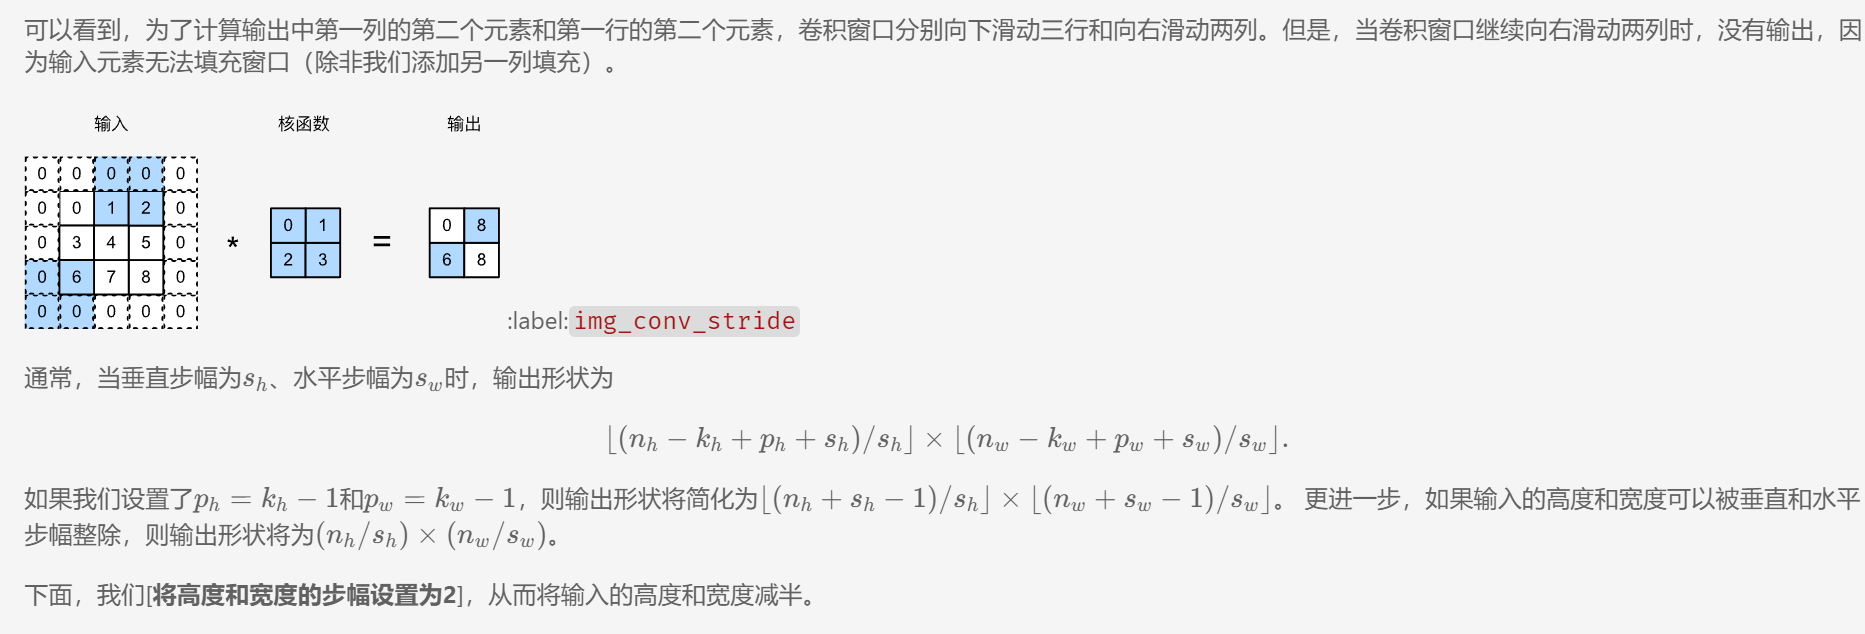

In [4]:
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=1, stride=2)
comp_conv2d(conv2d, X).shape

torch.Size([4, 4])

In [5]:
conv2d = nn.Conv2d(1, 1,kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))
comp_conv2d(conv2d, X).shape

torch.Size([2, 2])

默认情况下，填充为0， 步幅为1。

在实践中，很少使用不一致的步幅和填充，也就是说，通常有 $p_h = p_w$ 和 $s_h = s_w$。

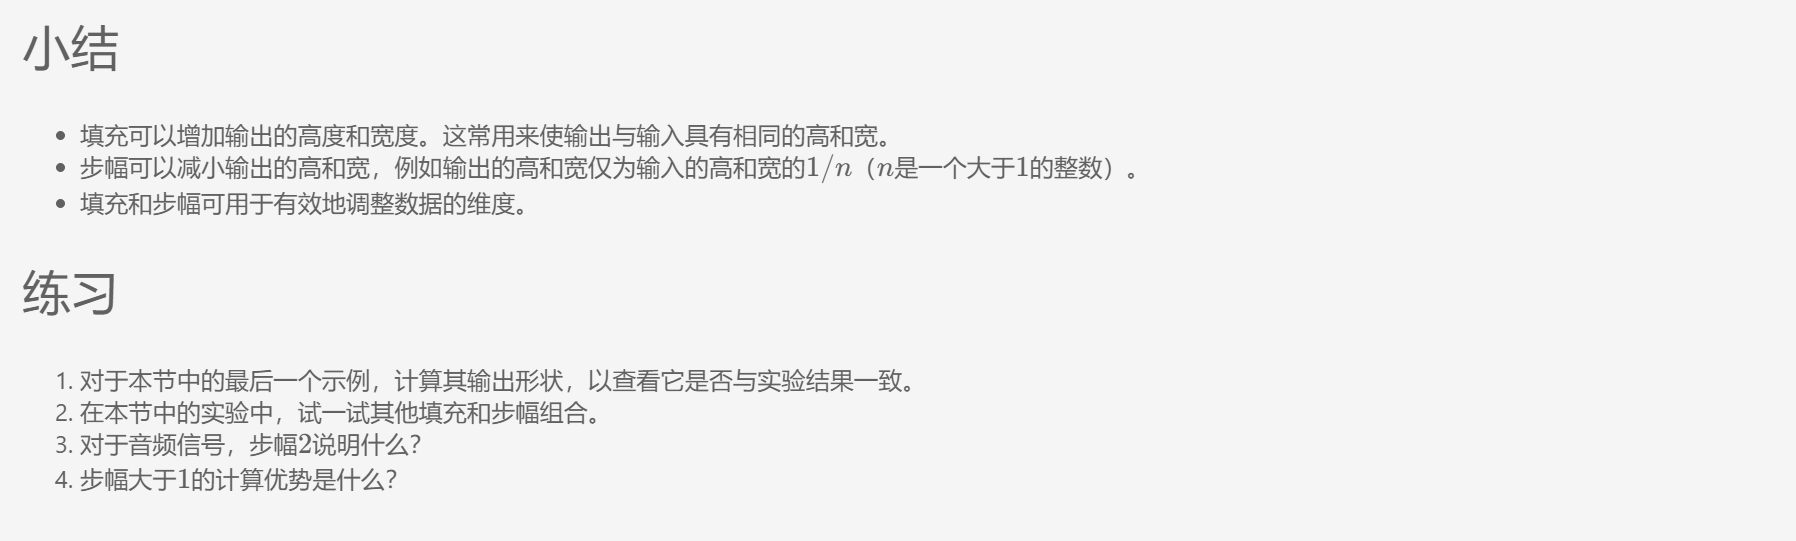